## Assignment 3

### Vishanth Hari Raj 

**Part (A) Metric multidimensional scaling:**
We do not ahead of time know what the number of underlying dimensions is,  so have to try various values of k and look at the corresponding  goodness-of-fit (GOF) or badness-of-fit (BOF) measure. This is similar to how machine learning modelers pick the "k" in  k-means, by looking at the plot of how average-within-group-variance (which is a BOF measure) decreases with  "k" and picking the "k" where is much benefit to going from k to k+1.  

In R a GOF  measure is obtained by doing cmds.out$GOF[1] where  higher numbers are better.  In Python, the BOF is obtained by stress_ attribute as mds_fit_out.stress_ where lower numbers are better.  While in the class we discussed stress as being between 0 and 1, these codes are internally scaling differently and the stress numbers they report are likely to be well above 1. For example, the python code, when run correctly with n_components=2, will product a stress number that you will find to be between 10 and 15.

For any particular value of "k", you can access the coordinates of each product in the k-dimensional space in R by doing cmds.out$points or in Python by mds_fit_out.embedding_

(1) Plot the GOF or BOF measure for every value of k from 1 to 9. What would you pick as the the most appropriate value? The guiding principle to pick the best k is to identify the value of k beyond which there is very limited improvement of GOF or BOF. Turnin: the plot, and your chosen value of "k" .

In [3]:
import pandas as pd
import numpy as np
from factor_analyzer import FactorAnalyzer


In [4]:
cars_od = pd.read_csv("cars.dissimilarity.csv", sep=",", index_col=0)
cars_ar = pd.read_csv("cars.ar.csv", sep=",", index_col=0)

In [5]:
cars_od

Infiniti  Ford  Audi  Toyota  Eagle  Honda  Saab  Pontiac  BMW  \
Infiniti         0     3     4       3      4      1     2        5    1   
Ford             3     0     4       6      0      3     4        1    4   
Audi             4     4     0       7      4      6     2        7    5   
Toyota           3     6     7       0      6      2     7        5    2   
Eagle            4     0     4       6      0      3     5        1    5   
Honda            1     3     6       2      3      0     3        3    2   
Saab             2     4     2       7      5      3     0        7    2   
Pontiac          5     1     7       5      1      3     7        0    6   
BMW              1     4     5       2      5      2     2        6    0   
Mercury          4     1     6       6      1      3     6        1    5   

          Mercury  
Infiniti        4  
Ford            1  
Audi            6  
Toyota          6  
Eagle           1  
Honda           3  
Saab            6  
Pontiac         1  
BMW             5  
Mercury         0

In [6]:
cars_ar

Attractive  Quiet  Unreliable  Poorly Built  Interesting  Sporty  \
Infiniti         5.6    6.3         2.9           1.6          3.6     4.1   
Ford             4.0    3.6         4.2           4.2          5.0     4.9   
Audi             4.6    5.2         3.7           2.6          4.0     3.8   
Toyota           5.6    4.2         2.0           2.1          4.3     6.2   
Eagle            4.0    3.5         4.3           4.3          3.9     4.9   
Honda            5.2    5.4         3.2           2.8          3.4     5.1   
Saab             5.3    4.8         3.7           2.8          3.4     4.3   
Pontiac          3.9    2.8         3.9           4.4          5.4     5.7   
BMW              5.7    5.0         2.3           1.8          3.3     4.1   
Mercury          3.9    3.3         4.0           4.3          3.9     5.2   

          Uncomfortable  Roomy  Easy Service  Prestige  Common  Economical  \
Infiniti            3.2    4.2           4.6       6.4     3.5         3.6   
Ford                4.0    3.9           4.9       3.5     3.6         3.7   
Audi                2.4    5.3           3.5       5.6     3.4         3.6   
Toyota              3.7    3.5           4.9       5.3     2.9         3.2   
Eagle               4.0    3.6           4.6       2.8     4.3         4.9   
Honda               3.3    3.9           5.0       4.7     3.9         5.0   
Saab                2.5    5.8           3.8       5.4     1.9         4.3   
Pontiac             4.3    3.3           4.7       3.8     4.3         3.1   
BMW                 3.5    4.3           4.1       6.4     2.8         4.3   
Mercury             4.4    3.6           4.6       3.3     3.9         4.6   

          Successful  AvantGarde  Poor Value  
Infiniti         5.3         4.3         3.4  
Ford             4.2         3.6         4.3  
Audi             5.0         3.6         4.3  
Toyota           5.5         4.9         3.5  
Eagle            3.7         4.4         3.6  
Honda            5.6         3.9         2.6  
Saab             5.3         4.7         2.9  
Pontiac          4.4         4.1         4.3  
BMW              5.9         3.7         3.3  
Mercury          3.9         4.5         3.8

In [7]:
from sklearn import manifold

In [8]:
mds = manifold.MDS(n_components=2, metric=True, max_iter=1000, eps=1e-9, dissimilarity="precomputed", n_jobs=1)
mds_fit_out = mds.fit(cars_od)

In [9]:
mds_fit_out.stress_

11.897700627995938

In [10]:
import matplotlib.pyplot as plt

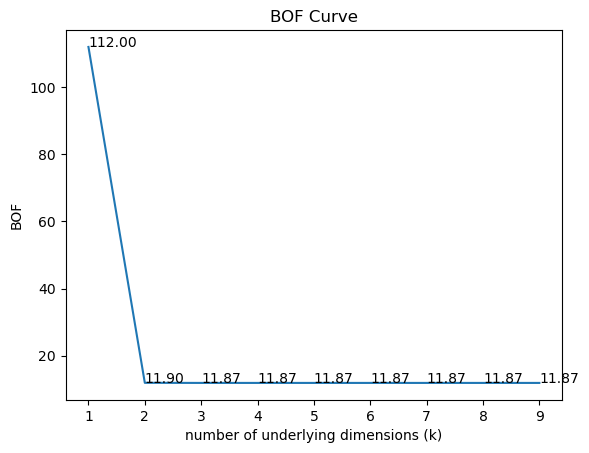

In [11]:
bof_curve = []

for k in range(1,10):
    mds = manifold.MDS(n_components=k, metric=True, max_iter=1000, eps=1e-9, dissimilarity="precomputed", n_jobs=1)
    mds_fit_out = mds.fit(cars_od)
    bof_curve.append(mds_fit_out.stress_)

plt.plot(range(1,10), bof_curve)
plt.title('BOF Curve')
plt.xlabel('number of underlying dimensions (k)')
plt.ylabel('BOF')
for i, stress in enumerate(bof_curve[:9]):
    plt.text(i+1, stress, f"{stress:.2f}")
plt.show()

(2) Regardless of what you found in (1) above, for this next part take the number of dimensions to be k=2. Plot the products at their coordinates as output by MDS. Next to each point on the plot, place a text label giving the name of the corresponding product like the in plots we saw in the lecture slides.  In R this is done by the text() command after creating the display of the plot, and in Python matplotlib.pyplot by using the annotate() command before  creating the display of the plot by show()

In [12]:
mds = manifold.MDS(n_components=2, metric=True, max_iter=1000, eps=1e-9, dissimilarity="precomputed", n_jobs=1)
mds_fit_out = mds.fit(cars_od)

In [13]:
mds_fit_out.embedding_

array([[ 0.6248886 ,  1.36127246],
       [-0.99201101, -1.60780725],
       [-3.42479114,  2.16849668],
       [ 3.87228772,  0.84095655],
       [-1.12663015, -1.96810598],
       [ 1.35982065,  0.09985282],
       [-1.30574938,  2.89546547],
       [ 0.0856589 , -3.21687555],
       [ 1.39412984,  2.10840328],
       [-0.48760403, -2.68165847]])

In [14]:
mds_fit_out.embedding_[1][0]

-0.9920110130394904

In [15]:
len(mds_fit_out.embedding_)

10

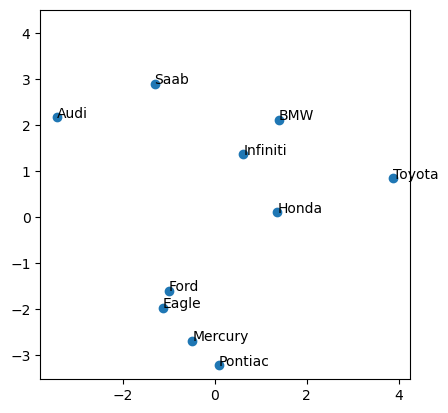

In [16]:
x, y = zip(*mds_fit_out.embedding_)
label = ["Infiniti","Ford","Audi","Toyota","Eagle","Honda","Saab","Pontiac","BMW","Mercury"]

plt.scatter(x, y)

for i in range(len(x)):
    plt.annotate(label[i], (x[i], y[i]))

plt.axis('square')
plt.show()

**Part (B) Nonmetric multidimensional scaling:**

(1) Plot the stress measure for every value of k from 1 to 5. What would you pick as the the most appropriate value? The guiding principle to pick the best k is to identify the value of k beyond which there is very limited improvement of GOF or BOF. Turnin: the plot, and your chosen value of "k" 

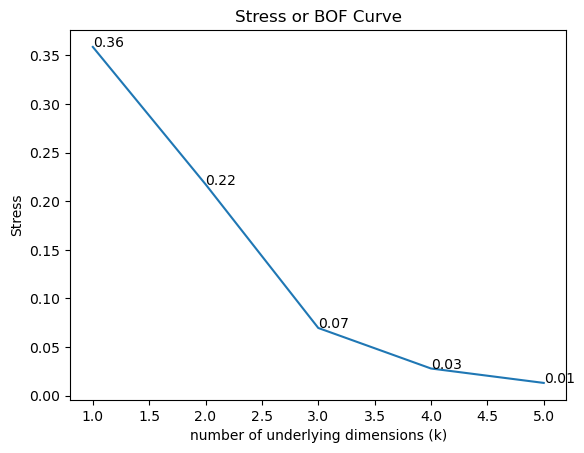

In [17]:
bof_curve = []

for k in range(1,6):
    mds = manifold.MDS(n_components=k, metric=False, max_iter=1000, eps=1e-9, dissimilarity="precomputed", n_jobs=1)
    mds_fit_out = mds.fit(cars_od)
    bof_curve.append(mds_fit_out.stress_)

plt.plot(range(1,6), bof_curve)
plt.title('Stress or BOF Curve')
plt.xlabel('number of underlying dimensions (k)')
plt.ylabel('Stress')
for i, stress in enumerate(bof_curve[:5]):
    plt.text(i+1, stress, f"{stress:.2f}")
plt.show()

(2) Regardless of what you found in (1) above, for this next part take the number of dimensions to be k=2. Produce an equally scaled plot of the points with labels corresponding to the product names.

In [18]:
mds = manifold.MDS(n_components=2, metric=False, max_iter=1000, eps=1e-9, dissimilarity="precomputed", n_jobs=1)
mds_fit_out = mds.fit(cars_od)

In [19]:
mds_fit_out.embedding_

array([[-0.19073298,  0.12555003],
       [ 0.35924752, -0.04472184],
       [ 0.39093147,  0.22363521],
       [ 0.16986857,  0.30337544],
       [ 0.39279949, -0.294942  ],
       [ 0.20139944, -0.2238742 ],
       [-0.15434713, -0.50254034],
       [-0.61778588,  0.17255826],
       [-0.46102647, -0.32727198],
       [-0.18876113,  0.5278593 ]])

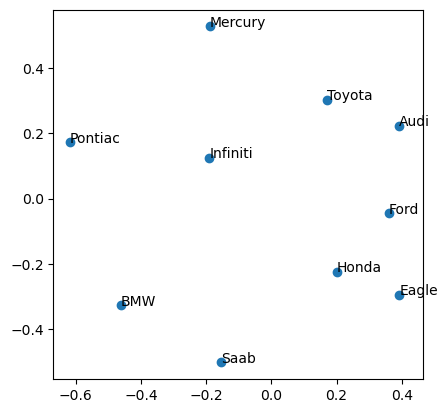

In [20]:
x, y = zip(*mds_fit_out.embedding_)
label = ["Infiniti","Ford","Audi","Toyota","Eagle","Honda","Saab","Pontiac","BMW","Mercury"]

plt.scatter(x, y)

for i in range(len(x)):
    plt.annotate(label[i], (x[i], y[i]))

plt.axis('square')
plt.show()

**Part (C) Factor Analysis**

As before, we have the situation we do with many dimension-reduction methods that we do not beforehand know what the number of underlying dimensions so have to try various values of the dimensionality and plot the GOF of BOF measure to look at where increasing the dimensionality contributes little to improving GOF or decreasing BOF.  In  R, the GOF is obtained from fa.out$fit and in Python by  fa_gof as computed above.

For any particular value of "nfactors", you can access the coordinates of each product in the nfactors-dimensional space in R by doing fa.out$scores and in Python by  fa_scores
as computed above.

(1) Plot the GOF measure for every value of nfactors from 1 to 10. What would you pick as the most appropriate value of "nfactors"? Turnin: the plot, and your chosen value of "nfactors".

In [21]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(n_factors=5, rotation=None)
fa_fit_out = fa.fit(cars_ar)
fa_communalities = fa_fit_out.get_communalities()
fa_gof = sum(fa_communalities)
fa_scores = fa_fit_out.transform(cars_ar)
fa_factor_loadings = fa_fit_out.loadings_

In [22]:
fa_gof

13.785100077819108

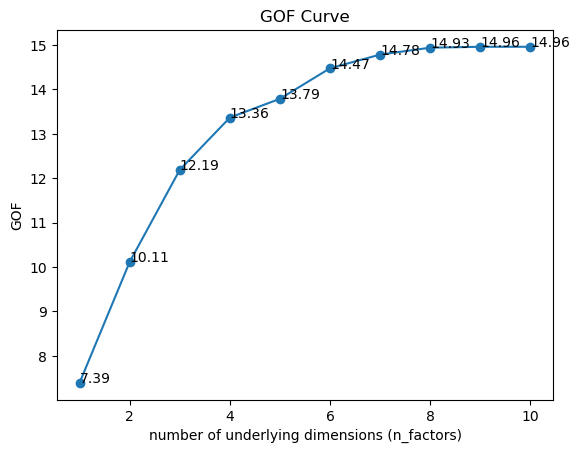

In [23]:
gof_curve = []

for n_factors in range(1,11):
    fa = FactorAnalyzer(n_factors=n_factors, rotation=None)
    fa_fit_out = fa.fit(cars_ar)
    fa_communalities = fa_fit_out.get_communalities()
    gof_curve.append(sum(fa_communalities))

x = [i for i in range(1,11)]
plt.plot(x, gof_curve, marker = 'o')
plt.title('GOF Curve')
plt.xlabel('number of underlying dimensions (n_factors)')
plt.ylabel('GOF')
for i,gof in enumerate(gof_curve[:10]):
    plt.text(x[i], gof, f"{gof:.2f}")
plt.show()

(2) Regardless of what you found in (1) above, take the number of dimensions to be nfactors=2. Produce an equally scaled plot of the points with labels corresponding to the product names.

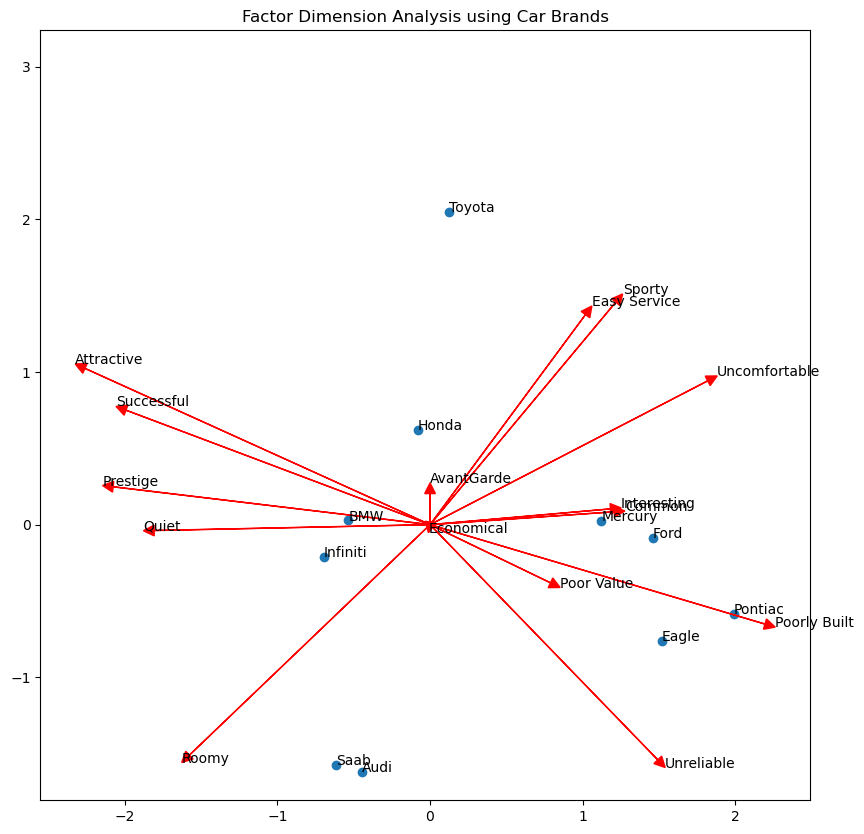

In [24]:
arrowscale = 2.5
arrow_origin_x = 0
arrow_origin_y = 0

fa = FactorAnalyzer(n_factors=2, rotation=None)
fa_fit_out = fa.fit(cars_ar)
fa_gof = sum(fa_fit_out.get_communalities())
fa_scores = fa_fit_out.transform(cars_ar)
fa_factor_loadings = fa_fit_out.loadings_

products= np.array(cars_ar.index)
attributes = np.array(cars_ar.columns)

fig, axis = plt.subplots(figsize = (10,10))
axis.scatter(fa_scores[:, 0], fa_scores[:, 1])

for i, name in enumerate(products):
    axis.annotate(name, (fa_scores[i, 0], fa_scores[i, 1]))

for i in range(len(attributes)):
    betax = fa_factor_loadings[i,0]
    betay = fa_factor_loadings[i,1]
    R2_val = fa_fit_out.get_communalities()[i]
    arrowlabel = attributes[i]
    arrow_end_x = arrowscale* R2_val*betax/np.sqrt(betax**2+betay**2)
    arrow_end_y = arrowscale* R2_val*betay/np.sqrt(betax**2+betay**2)
    axis.arrow(arrow_origin_x,arrow_origin_y,arrow_end_x-arrow_origin_x, arrow_end_y-arrow_origin_y, 
             length_includes_head=True, head_width=0.07, head_length=0.07, color = 'red')
    axis.annotate(arrowlabel, (arrow_end_x, arrow_end_y))
    
plt.axis('square')
plt.title("Factor Dimension Analysis using Car Brands")
plt.show()
